# Entregable Individual Etapa 3: Generación de Modelos de Aprendizaje y Evaluación de los mismos 


## Equipo 2
- A01730548 Javier Hernández Arellano
- A00831090 Natalia Monserrat González De León
- A00831191 Diego Alejandro Flores Meza
- A01746867 Katia Italiby Luna Hernández


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn') 
%matplotlib inline

In [3]:
df = pd.read_csv('datos_preparados.csv')

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [322]:
df['Especialidad'].value_counts()

Ingenierías Target            730
Otras Ingenierías              98
Negocios                       71
Sistemas                       66
Tecnologías de Información     36
Otras                          16
Minería                         3
Otras Target                    1
Otras ingenierías               1
Name: Especialidad, dtype: int64

In [323]:
df

,Ingresados Si/No,Destacado,Ingles,Destacado Pym,Altamente Recomendado,Apto/No Apto,Actividad Grupal.1,ID Candidato,Status Académico,Resto-Soft,...,Perfil Pymetrics,Especialidad,Carrera Gestional,Institución Acción,Acción,Tipo de Acción,País,Nombre Evento,Nombres,PEA
0,1,1,2.0,1,1,1.0,5.0,1.012101e+09,NaN,0.0,...,DIGI - Supply Chain,Ingenierías Target,Ing. Industrial,TM,Ternium Contact,Targetizada,México,Evento,N1,PEA 20-21
1,0,1,2.0,1,1,1.0,5.0,1.012101e+09,NaN,0.0,...,DIGI - Supply Chain,Ingenierías Target,Ing. Industrial,U,Ternium Contact,Targetizada,México,Evento 4,N2,PEA 20-21
2,1,1,2.0,1,1,1.0,5.0,1.012101e+09,NaN,2.0,...,Calidad - Operaciones,Ingenierías Target,Ing. Mecatrónica/Electrónica,IY,Ternium Contact,Targetizada,México,Evento 0,N4,PEA 20-21
3,0,0,NaN,0,0,NaN,NaN,1.012101e+09,NaN,NaN,...,DIGI - Supply Chain,Negocios,Negocios Internacionales,TM,Ternium Contact,Targetizada,México,Evento 4,N5,PEA 20-21
4,0,0,NaN,0,0,NaN,NaN,1.012101e+09,NaN,0.0,...,Calidad - Operaciones,Ingenierías Target,Ing. Química,IY,Ternium Contact,Targetizada,México,Evento 0,N6,PEA 20-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0,0,NaN,0,0,NaN,NaN,NaN,NaN,0.0,...,MTTO - DIMA (POR),Ingenierías Target,Ing. Metalúrgica y Materiales,F,Ternium Contact,Targetizado,Brasil,Evento 83,N5735,PEA 21-22
1188,0,0,NaN,0,0,NaN,NaN,NaN,NaN,0.0,...,MTTO - DIMA (POR),Ingenierías Target,Ing. Metalúrgica y Materiales,F,Ternium Contact,Targetizado,Brasil,Evento 83,N5736,PEA 21-22
1189,0,0,NaN,0,0,NaN,NaN,NaN,NaN,1.0,...,MTTO - DIMA (POR),Ingenierías Target,Ing. Metalúrgica y Materiales,F,Ternium Contact,Targetizado,Brasil,Evento 83,N5738,PEA 21-22
1190,0,0,NaN,0,0,NaN,NaN,NaN,NaN,0.0,...,MTTO - DIMA (POR),Ingenierías Target,Ing. Metalúrgica y Materiales,F,Ternium Contact,Targetizado,Brasil,Evento 83,N5739,PEA 21-22


In [324]:
print("Dimensiones del dataset : {}".format(df.shape))

Dimensiones del dataset : (1192, 25)


In [325]:
df.groupby('Ingles')[['Altamente Recomendado', 'Apto/No Apto', 'Ingresados Si/No']].sum()

,Altamente Recomendado,Apto/No Apto,Ingresados Si/No
Ingles,,,
0.0,16,0.0,0
1.0,34,3.0,1
2.0,42,25.0,20
3.0,27,11.0,8


In [326]:
df.groupby('Avance')[['Altamente Recomendado', 'Apto/No Apto', 'Ingresados Si/No']].sum()

,Altamente Recomendado,Apto/No Apto,Ingresados Si/No
Avance,,,
10,51,25.0,2
11,0,3.0,0
2,0,0.0,0
3,0,0.0,0
4,6,10.0,4
5,7,31.0,11
6,40,24.0,10
7,26,50.0,8
8,66,38.0,12


Altamente Recomendado
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

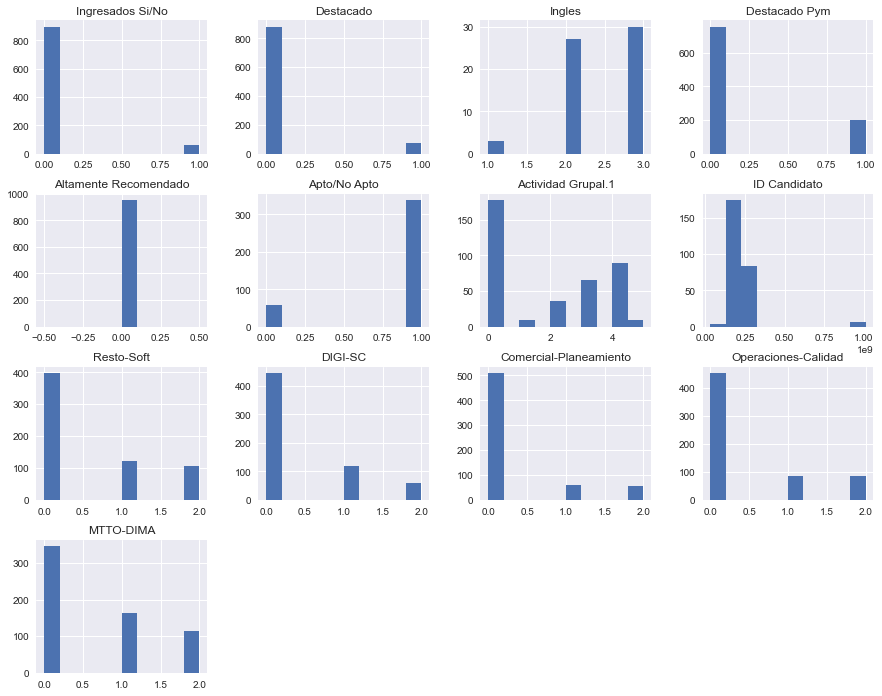

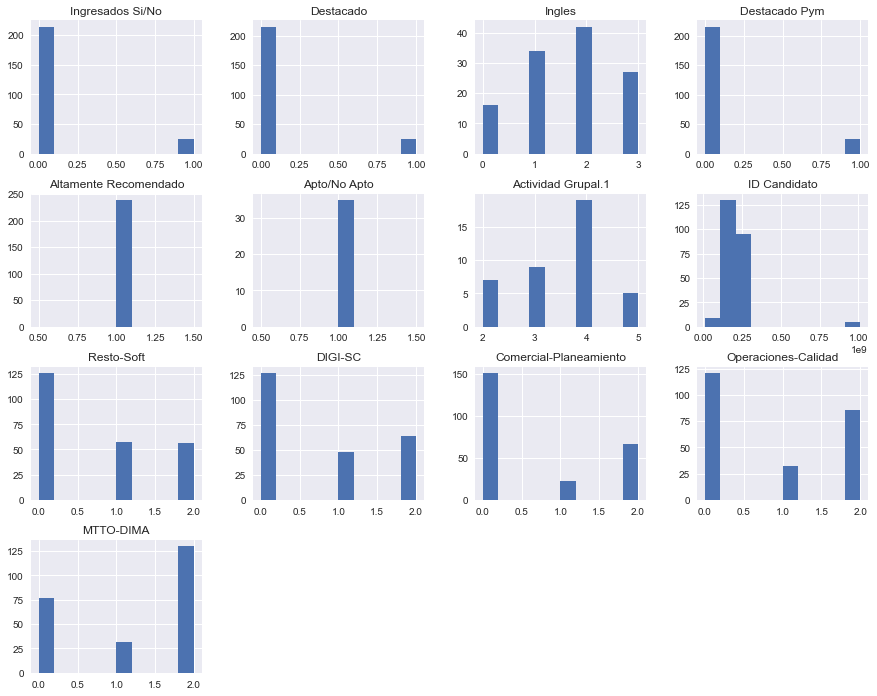

In [327]:
df.groupby('Altamente Recomendado').hist(figsize=(15,12))

## Data Cleaning

In [328]:
df.columns

Index(['Ingresados Si/No', 'Destacado', 'Ingles', 'Destacado Pym',
       'Altamente Recomendado', 'Apto/No Apto', 'Actividad Grupal.1',
       'ID Candidato', 'Status Académico', 'Resto-Soft', 'DIGI-SC',
       'Comercial-Planeamiento', 'Operaciones-Calidad', 'MTTO-DIMA', 'Avance',
       'Perfil Pymetrics', 'Especialidad', 'Carrera Gestional',
       'Institución Acción', 'Acción', 'Tipo de Acción ', 'País',
       'Nombre Evento', 'Nombres', 'PEA'],
      dtype='object')

In [329]:
# Función que genera una tabla con la descripción y análisis de valores ausentes dentro del dataframe.

def nan_description(data):
    rows = data.shape[0]        
    data_types = data.dtypes
    counts = data.apply(lambda x: x.count())
    unique_vals = data.apply(lambda x: x.unique().shape[0])
    nulls = data.apply(lambda x: x.isnull().sum())
    null_percent = (data.isnull().sum()/rows)*100
    cols = {'dtype':data_types, 'No. datos':counts, 'Valores unicos':unique_vals, 'Valores nulos':nulls, '% Nulos':null_percent}
    table = pd.DataFrame(data=cols)
    return table

In [330]:
null_tbl = nan_description(df)
# null_tbl.reset_index(level=[0],inplace =True)
null_tbl.sort_values(by='% Nulos', ascending=False, inplace=True)
display(null_tbl)

,dtype,No. datos,Valores unicos,Valores nulos,% Nulos
Ingles,float64,179,5,1013,84.983221
Actividad Grupal.1,float64,426,8,766,64.261745
Apto/No Apto,float64,432,3,760,63.758389
ID Candidato,float64,509,510,683,57.298658
Status Académico,object,642,8,550,46.140940
Operaciones-Calidad,float64,864,4,328,27.516779
DIGI-SC,float64,864,4,328,27.516779
MTTO-DIMA,float64,864,4,328,27.516779
Comercial-Planeamiento,float64,864,4,328,27.516779
Resto-Soft,float64,864,4,328,27.516779


No se tomarán en cuenta todas las columnas, por lo que no es necesario limpiarlas todas.

In [5]:
# VARIABLES IMPORTANTES

df_mod = df[['Actividad Grupal.1', 'Avance','Especialidad', 'Apto/No Apto', 'Operaciones-Calidad', 'DIGI-SC', 'MTTO-DIMA',
                 'Comercial-Planeamiento', 'Resto-Soft', 'Ingresados Si/No', 'Destacado', 'Destacado Pym', 'Ingles', 'Altamente Recomendado']]
# df_mod = df[['Actividad Grupal.1', 'Avance','Especialidad', 'Apto/No Apto', 'Estatus', 'Operaciones-Calidad', 'DIGI-SC', 'MTTO-DIMA',
#                  'Comercial-Planeamiento', 'Resto-Soft', 'Ingresados Si/No', 'Destacado', 'Destacado Pym', 'Ingles']]

df_mod.head()


,Actividad Grupal.1,Avance,Especialidad,Apto/No Apto,Operaciones-Calidad,DIGI-SC,MTTO-DIMA,Comercial-Planeamiento,Resto-Soft,Ingresados Si/No,Destacado,Destacado Pym,Ingles,Altamente Recomendado
0,5.0,NaN,Ingenierías Target,1.0,2.0,0.0,1.0,2.0,0.0,1,1,1,2.0,1
1,5.0,6,Ingenierías Target,1.0,2.0,0.0,0.0,0.0,0.0,0,1,1,2.0,1
2,5.0,6,Ingenierías Target,1.0,2.0,1.0,2.0,0.0,2.0,1,1,1,2.0,1
3,NaN,NaN,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
4,NaN,6,Ingenierías Target,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0


In [332]:
nan_description(df_mod)

,dtype,No. datos,Valores unicos,Valores nulos,% Nulos
Actividad Grupal.1,float64,426,8,766,64.261745
Avance,object,878,12,314,26.342282
Especialidad,object,1022,10,170,14.261745
Apto/No Apto,float64,432,3,760,63.758389
Operaciones-Calidad,float64,864,4,328,27.516779
DIGI-SC,float64,864,4,328,27.516779
MTTO-DIMA,float64,864,4,328,27.516779
Comercial-Planeamiento,float64,864,4,328,27.516779
Resto-Soft,float64,864,4,328,27.516779
Ingresados Si/No,int64,1192,2,0,0.000000


In [333]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_mod.Especialidad = le.fit_transform(df_mod['Especialidad'])

C:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [334]:
df_mod.Especialidad.value_counts()

0    730
9    170
4     98
2     71
7     66
8     36
3     16
1      3
5      1
6      1
Name: Especialidad, dtype: int64

In [6]:
df_mod['Avance'].replace('Egresado', 0, inplace = True)
df_mod['Actividad Grupal.1'].replace(['No', 4.5], [np.nan, 4], inplace = True)
# df_mod['Especialidad'].replace(['Ingenierías Target', 'Otras Ingenierías'], [np.nan, 4], inplace = True)

c:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
df_mod['Actividad Grupal.1'].fillna(df_mod['Actividad Grupal.1'].mode()[0], inplace=True)
df_mod['Avance'].fillna(df_mod['Avance'].mode()[0], inplace=True)
df_mod['Ingles'].fillna(df_mod['Ingles'].mode()[0], inplace=True)
df_mod['Especialidad'].fillna(df_mod['Especialidad'].mode()[0], inplace=True)
df_mod['Apto/No Apto'].fillna(df_mod['Apto/No Apto'].mode()[0], inplace=True)
# df_mod['Estatus'].fillna(df_mod['Estatus'].mode()[0], inplace=True)
df_mod['Operaciones-Calidad'].fillna(df_mod['Operaciones-Calidad'].mode()[0], inplace=True)
df_mod['DIGI-SC'].fillna(df_mod['DIGI-SC'].mode()[0], inplace=True)
df_mod['MTTO-DIMA'].fillna(df_mod['MTTO-DIMA'].mode()[0], inplace=True)
df_mod['Comercial-Planeamiento'].fillna(df_mod['Comercial-Planeamiento'].mode()[0], inplace=True)
df_mod['Resto-Soft'].fillna(df_mod['Resto-Soft'].mode()[0], inplace=True)


c:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
df_mod.Avance = df_mod.Avance.astype(float)

c:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [338]:
nan_description(df_mod)

,dtype,No. datos,Valores unicos,Valores nulos,% Nulos
Actividad Grupal.1,float64,1192,6,0,0.0
Avance,float64,1192,11,0,0.0
Especialidad,int32,1192,10,0,0.0
Apto/No Apto,float64,1192,2,0,0.0
Operaciones-Calidad,float64,1192,3,0,0.0
DIGI-SC,float64,1192,3,0,0.0
MTTO-DIMA,float64,1192,3,0,0.0
Comercial-Planeamiento,float64,1192,3,0,0.0
Resto-Soft,float64,1192,3,0,0.0
Ingresados Si/No,int64,1192,2,0,0.0


In [339]:
df.Especialidad.value_counts()

Ingenierías Target            730
Otras Ingenierías              98
Negocios                       71
Sistemas                       66
Tecnologías de Información     36
Otras                          16
Minería                         3
Otras Target                    1
Otras ingenierías               1
Name: Especialidad, dtype: int64

In [340]:
df_mod.Especialidad.value_counts()

0    730
9    170
4     98
2     71
7     66
8     36
3     16
1      3
5      1
6      1
Name: Especialidad, dtype: int64

<AxesSubplot:>

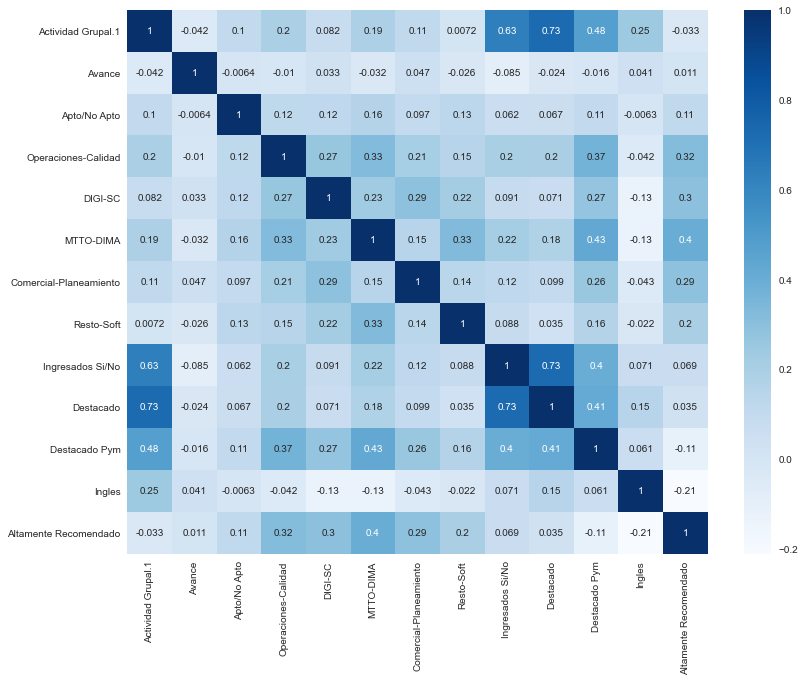

In [9]:
import seaborn as sns

plt.figure(figsize=(13,10))
sns.heatmap(df_mod.corr(),cbar=True, annot=True, cmap='Blues')

## Feature Engineering

We will use all the features available. We separate the data set into features and the response that we are going to predict. We will assign the features to the X variable and the response to the y variable.

<AxesSubplot:>

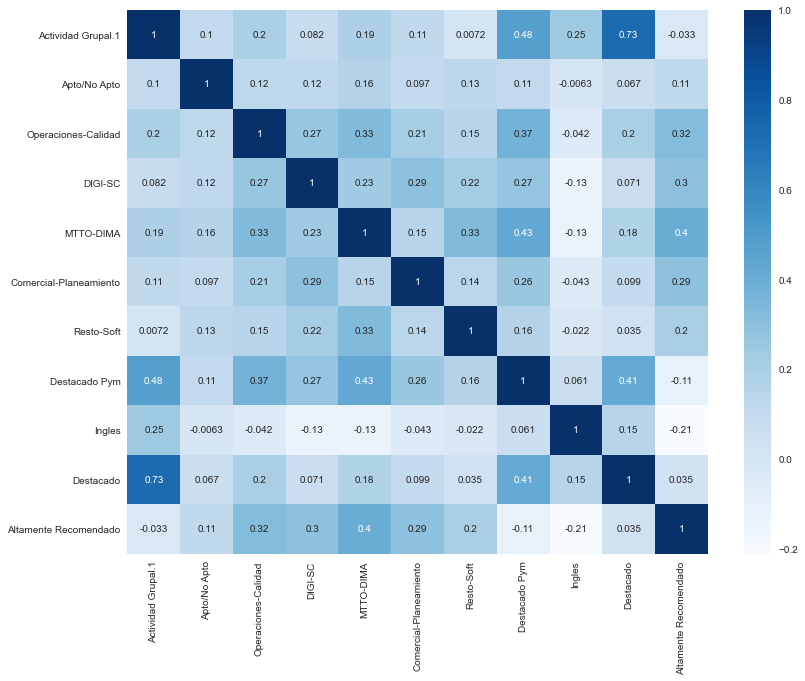

In [12]:
model_var = df_mod[['Actividad Grupal.1', 'Apto/No Apto', 'Operaciones-Calidad', 'DIGI-SC', 'MTTO-DIMA', 'Comercial-Planeamiento', 
            'Resto-Soft', 'Destacado Pym', 'Ingles', 'Destacado','Altamente Recomendado']]

plt.figure(figsize=(13,10))
sns.heatmap(model_var.corr(),cbar=True, annot=True, cmap='Blues')

In [342]:
# feature_names = ['Actividad Grupal.1', 'Apto/No Apto', 'Operaciones-Calidad', 'DIGI-SC', 'MTTO-DIMA', 'Especialidad',
#                  'Comercial-Planeamiento', 'Resto-Soft', 'Ingresados Si/No', 'Destacado Pym', 'Ingles', 'Destacado' ]

feature_names = ['Actividad Grupal.1', 'Apto/No Apto', 'Operaciones-Calidad', 'DIGI-SC', 'MTTO-DIMA',
                 'Comercial-Planeamiento', 'Resto-Soft', 'Destacado Pym', 'Ingles', 'Destacado' ]

# Todas las demás columnas son las variables independientes
X = df_mod[feature_names]

# Se define la variable objetivo
y = df_mod['Altamente Recomendado']

## Model Selection

We will import the necessary libraries for the notebook. We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest, and Gradient Boost to be contenders for the best classifier.

In [343]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [344]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

### Métodos de evaluación

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Train/Test split

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=4)

### Modelos forma básica

Se implementan de manera rápida todos los modelos de clasificación vistos en clase, es decir sin modificar hiperparámetros.

In [347]:
models

[('KNN', KNeighborsClassifier()),
 ('SVC', SVC()),
 ('LR', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('GNB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('GB', GradientBoostingClassifier())]

In [348]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.941423
1  SVC  0.995816
2   LR  0.899582
3   DT  0.974895
4  GNB  0.246862
5   RF  0.979079
6   GB  0.983264


#### Matriz de Confusión

In [349]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    

    print('Modelo actual: ', name)
    print(cfm)
    print(classification_report(y_test, y_pred), '\n')
    print('-----------------------------------------------------------------')

Modelo actual:  KNN
[[185   6]
 [  8  40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       191
           1       0.87      0.83      0.85        48

    accuracy                           0.94       239
   macro avg       0.91      0.90      0.91       239
weighted avg       0.94      0.94      0.94       239
 

-----------------------------------------------------------------
Modelo actual:  SVC
[[191   0]
 [  1  47]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      0.98      0.99        48

    accuracy                           1.00       239
   macro avg       1.00      0.99      0.99       239
weighted avg       1.00      1.00      1.00       239
 

-----------------------------------------------------------------
Modelo actual:  LR
[[186   5]
 [ 19  29]]
              precision    recall  f1-score   support

           0       0.91    

#### K-Fold Cross Validation 01

In [350]:
from sklearn.model_selection import KFold

names = []
scores = []

for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10, shuffle=True) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.944615
1  SVC  0.971506
2   LR  0.886793
3   DT  0.966464
4  GNB  0.249146
5   RF  0.973186
6   GB  0.972360


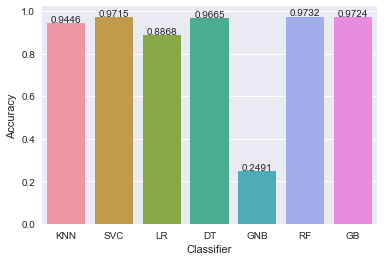

In [351]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### Visualización Árboles de decisión

Los niveles de accuracy que se obtienen son extremadamente altos para todos los modelos probados. Esto más allá de poder decirnos si los datos están bien ajustados o que los modelos son muy eficientes, también podría deberse a la poca variabilidad y gran diferencia de valores en la variable target y en las mismas independientes.

In [352]:
from sklearn import tree

In [353]:
# Fit the classifier with default hyper-parameters

#Arboles de decisión
algoritmo = DecisionTreeClassifier(criterion = 'entropy')
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)


In [354]:
cfm = confusion_matrix(y_test, y_pred)

print(cfm, '\n')
print(classification_report(y_test, y_pred), '\n')

[[188   3]
 [  2  46]] 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.94      0.96      0.95        48

    accuracy                           0.98       239
   macro avg       0.96      0.97      0.97       239
weighted avg       0.98      0.98      0.98       239
 



Score Métrica - Área bajo la curva (AUC): 0.9712041884816754


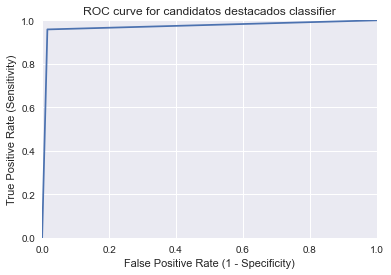

In [355]:
y_prob = algoritmo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [356]:
text_representation = tree.export_text(algoritmo)
print(text_representation)

|--- feature_4 <= 1.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_6 <= 1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- f

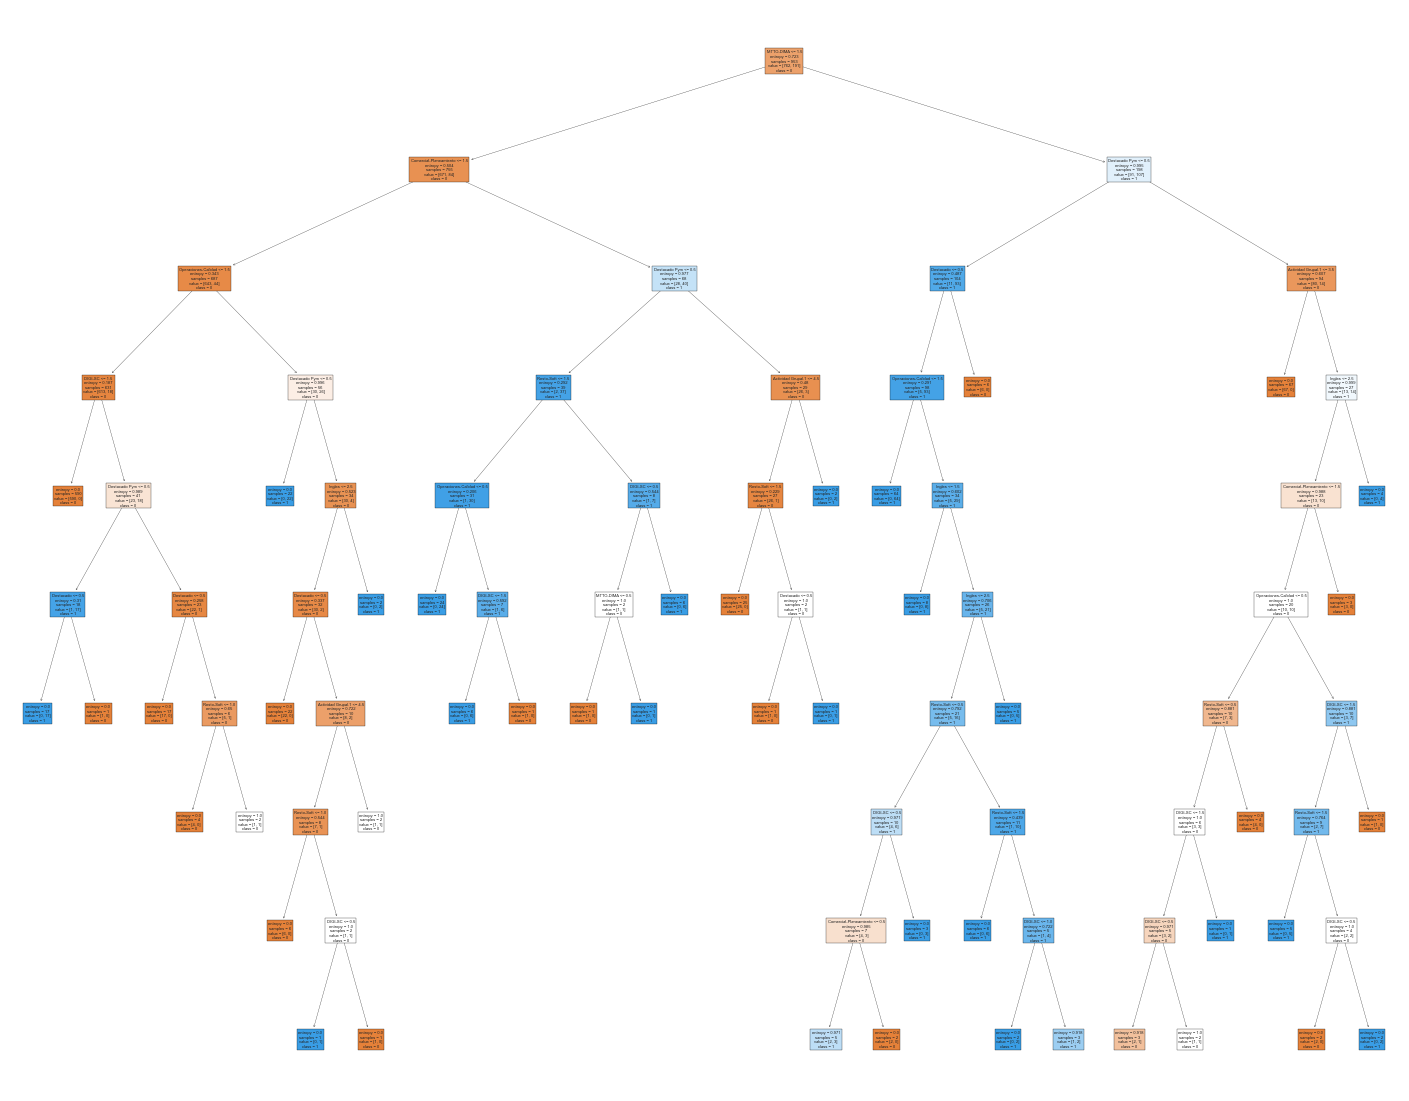

In [357]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(algoritmo, 
                   feature_names=df_mod[feature_names].columns,  
                   class_names=str("01"),
                   filled=True)

Este modelo tiene un gran accuracy, lo que sería lo ideal pero esto puede deberse a la poca variabilidad que hay en los datos, por lo que se implementarán los mismos modelos con modificación deh hiperparámetros para ver si se obtienen resultados distintos.

## Modificación de Hiperparámetros

### KNN 

In [358]:
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 4)

In [359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2,)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

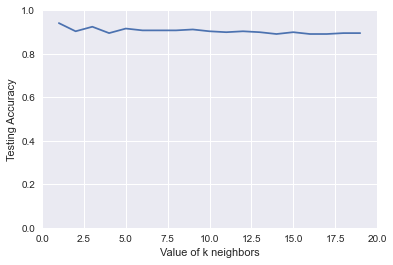

In [360]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k neighbors')
plt.xlim(0, 20)
plt.ylim(0,1)
plt.ylabel('Testing Accuracy');

In [361]:
scores_list

[0.9414225941422594,
 0.9037656903765691,
 0.9246861924686193,
 0.895397489539749,
 0.9163179916317992,
 0.9079497907949791,
 0.9079497907949791,
 0.9079497907949791,
 0.9121338912133892,
 0.9037656903765691,
 0.899581589958159,
 0.9037656903765691,
 0.899581589958159,
 0.891213389121339,
 0.899581589958159,
 0.891213389121339,
 0.891213389121339,
 0.895397489539749,
 0.895397489539749]

In [362]:
## MATRIZ DE CONFUSIÓN - MÉTRICAS DE CLASIFICACIÓN

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2,)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[[194   2]
 [ 12  31]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       196
           1       0.94      0.72      0.82        43

    accuracy                           0.94       239
   macro avg       0.94      0.86      0.89       239
weighted avg       0.94      0.94      0.94       239

[[194   2]
 [ 21  22]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       196
           1       0.92      0.51      0.66        43

    accuracy                           0.90       239
   macro avg       0.91      0.75      0.80       239
weighted avg       0.90      0.90      0.89       239

[[193   3]
 [ 15  28]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       196
           1       0.90      0.65      0.76        43

    accuracy                           0.92       239
   macro avg       0.92      0.82      0.86       239
weigh

Score Área bajo la curva (AUC): 0.8553630754627433
Score Área bajo la curva (AUC): 0.8850854295206455
Score Área bajo la curva (AUC): 0.9259017560512578
Score Área bajo la curva (AUC): 0.9436995728523967
Score Área bajo la curva (AUC): 0.9378856193640246
Score Área bajo la curva (AUC): 0.9338514475557664
Score Área bajo la curva (AUC): 0.9490982439487423
Score Área bajo la curva (AUC): 0.9515899383009017
Score Área bajo la curva (AUC): 0.9565140009492169
Score Área bajo la curva (AUC): 0.9587683910773612
Score Área bajo la curva (AUC): 0.959717607973422
Score Área bajo la curva (AUC): 0.9630398671096345
Score Área bajo la curva (AUC): 0.958827717133365
Score Área bajo la curva (AUC): 0.9580564784053156
Score Área bajo la curva (AUC): 0.9597769340294258
Score Área bajo la curva (AUC): 0.9555054579971524
Score Área bajo la curva (AUC): 0.9579378262933081
Score Área bajo la curva (AUC): 0.9533103939250118
Score Área bajo la curva (AUC): 0.9525984812529664


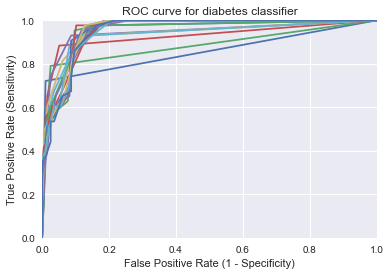

In [363]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2,)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

    y_prob = knn.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    print('Score Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)


In [364]:
print('Max scroe:{}'.format(max(scores_list)))
print('Min scroe:{}'.format(min(scores_list)))
print('Median scroe:{}'.format(np.median(scores_list)))

Max scroe:0.9414225941422594
Min scroe:0.891213389121339
Median scroe:0.9037656903765691


In [365]:
print('Value for K-Neighbors max scroe: {}'.format(scores_list.index(max(scores_list)) + 1 ))
print('Value for K-Neighbors min scroe: {}'.format(scores_list.index(min(scores_list)) + 1 ))
print('Value for K-Neighbors median scroe: {}'.format(scores_list.index(np.median(scores_list)) + 1 ))

Value for K-Neighbors max scroe: 1
Value for K-Neighbors min scroe: 14
Value for K-Neighbors median scroe: 2


Finalmente se determina que el mejor modelo para el clasificador KNN es aquel con `k = 5` con un score de **0.91**.

In [366]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#Entreno el modelo
knn.fit(X_train, y_train)
#Realizo una predicción
y_pred = knn.predict(X_test)

In [367]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[193   3]
 [ 17  26]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       196
           1       0.90      0.60      0.72        43

    accuracy                           0.92       239
   macro avg       0.91      0.79      0.84       239
weighted avg       0.92      0.92      0.91       239



Score Métrica - Área bajo la curva (AUC): 0.9378856193640246


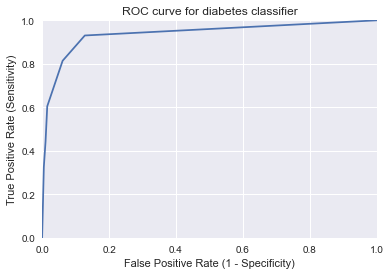

In [368]:
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):' , roc_auc_score(y_test, y_prob))


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### Resultados

Utilizando un ciclo `for` se pudo determinar que el valor `k = 5` es el ideal para obtener el mejor accuracy y métricas de clasificación del modelo. Igualmente con ayuda de la gráfica ROC y el área bajo la curva podemos decir que con estas características el modelo puede distinguir muy satisfactoriamente las clases positivas (destacado) de las negativas (no destacado) con un score de 0.96.

### Regresión Logística

In [369]:
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=10000, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr, distributions, random_state=0)

search = clf.fit(X_train, y_train)

In [370]:
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [371]:
result_lr = search.fit(X,y)
print('Best Score: %s' % result_lr.best_score_)
print('Best Hyperparameters: %s' % result_lr.best_params_)

Best Score: 0.8808445553953799
Best Hyperparameters: {'C': 1.75034884505077, 'penalty': 'l2'}


In [372]:
# AJUSTE DEL MODDELO CON MEJORES HIPERPARÁMETROS

lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=10000, random_state=0, C=2.4942547871438894, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(C=2.4942547871438894, max_iter=10000, random_state=0,
                   solver='saga', tol=0.01)

In [373]:
# MATRIZ DE CONFUSIÓN Y MÉTRICAS DE CLASIFICACIÓN

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[193   3]
 [ 17  26]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       196
           1       0.90      0.60      0.72        43

    accuracy                           0.92       239
   macro avg       0.91      0.79      0.84       239
weighted avg       0.92      0.92      0.91       239
 



Score Área bajo la curva (AUC): 0.8411841480778358


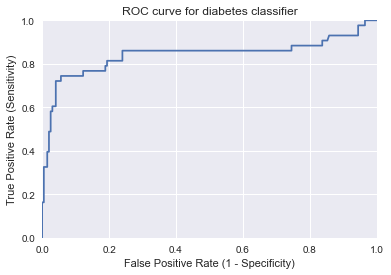

In [374]:
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#### Resultados

Se obtuvo un score del 0.95 utilizando la regresió logística. Para obtener este score se utilizó el `RandomizedSearchCV` con el fin de determinar los mejores hiperparámetros que debería tener el modelo para un mejor accuracy. Aunado a esto, de la gráfica anterior es posible afirmar que el modelo es capaz de clasificar y distinguir casi perfectamente entre las clases positivas (destacado) y negativas (no destacado).

### Árboles de decisión - criterio de gini

In [375]:
# Separar los datos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [376]:
# Cross validation para determinar la mejor profundidad que debería tener el árbol

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i, criterion='gini',  random_state=8)
    # Realiza 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9135284810126582), (4, 0.9398417721518987), (5, 0.9648892405063292), (6, 0.9661550632911393), (7, 0.9661708860759493), (8, 0.9586708860759494), (9, 0.9599208860759495), (10, 0.9599208860759495), (11, 0.9599208860759495), (12, 0.9599208860759495), (13, 0.9599208860759495), (14, 0.9599208860759495), (15, 0.9599208860759495), (16, 0.9599208860759495), (17, 0.9599208860759495), (18, 0.9599208860759495), (19, 0.9599208860759495)]


In [377]:
# AJUSTAR MODELO CON LA PROFUNDIDAD CON LA QUE SE LOGRA MEJOR SCORE SEGÚN EL CROSS VALIDATION

dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=8)


# fit the model
dt_gini.fit(X_train, y_train)

y_pred = dt_gini.predict(X_test)

In [378]:
text_representation = tree.export_text(algoritmo)
print(text_representation)

|--- feature_4 <= 1.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_6 <= 1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- f

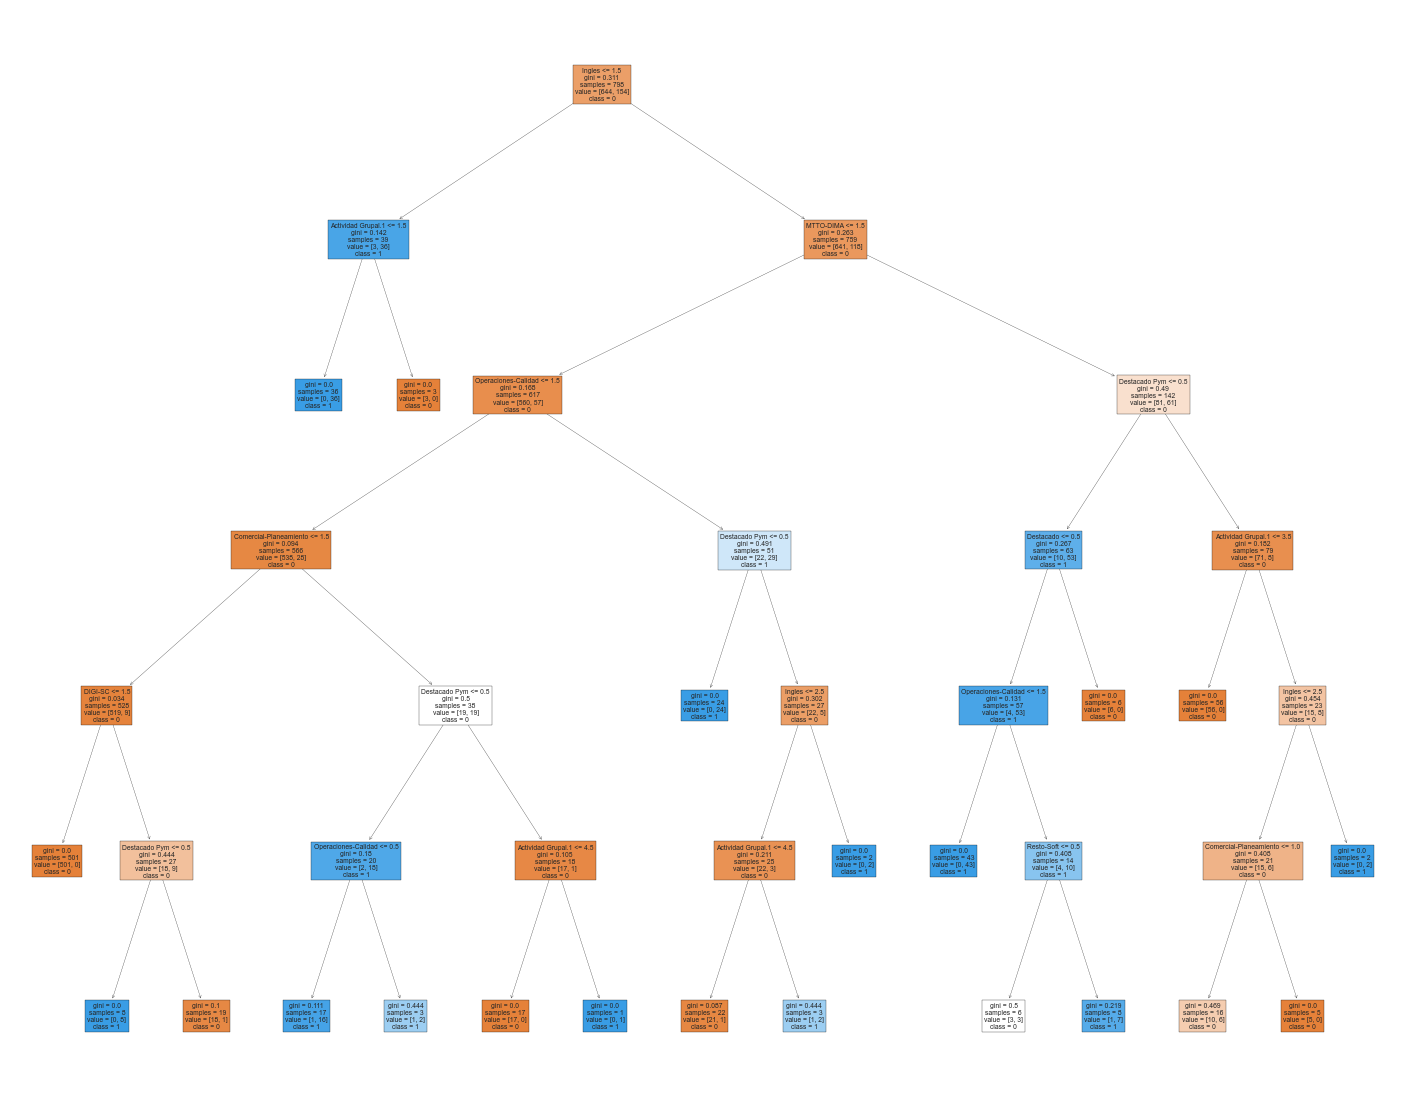

In [379]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_gini, 
                   feature_names=df_mod[feature_names].columns,  
                   class_names=str("01"),
                   filled=True)


In [380]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[308   1]
 [ 12  73]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       309
           1       0.99      0.86      0.92        85

    accuracy                           0.97       394
   macro avg       0.97      0.93      0.95       394
weighted avg       0.97      0.97      0.97       394
 



Score Métrica - Área bajo la curva (AUC): 0.9959832476679992


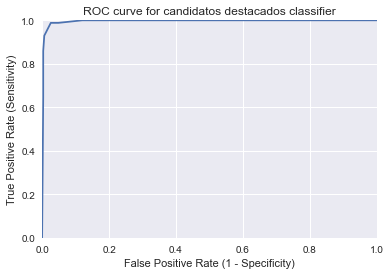

In [381]:
y_prob = dt_gini.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

El resultado final para el modelo de Árbol de decisión utilizando el criterio de gini nos da un accuracy del 0.99. Este modelo se definió utilizando el cross validation para determinar la mejor profundidad que debería tener el mismo. En general presenta un buen rendimiento del modelo.

### Árboles de decisión - criterio de entropía

In [382]:
# Separar los datos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [383]:
# Cross validation para determinar la mejor profundidad que debería tener el árbol

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy',  random_state=8)
    # Realiza 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9147784810126582), (4, 0.9285601265822784), (5, 0.9611392405063292), (6, 0.9624050632911393), (7, 0.9636708860759494), (8, 0.9536708860759493), (9, 0.9586708860759494), (10, 0.9586708860759494), (11, 0.9586708860759494), (12, 0.9586708860759494), (13, 0.9586708860759494), (14, 0.9586708860759494), (15, 0.9586708860759494), (16, 0.9586708860759494), (17, 0.9586708860759494), (18, 0.9586708860759494), (19, 0.9586708860759494)]


In [384]:
# AJUSTAR MODELO CON LA PROFUNDIDAD CON LA QUE SE LOGRA MEJOR SCORE SEGÚN EL CROSS VALIDATION

dt_ent = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=8)


# fit the model
dt_ent.fit(X_train, y_train)

y_pred = dt_ent.predict(X_test)

In [385]:
text_representation = tree.export_text(dt_ent)
print(text_representation)

|--- feature_8 <= 1.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 1
|   |--- feature_0 >  1.50
|   |   |--- class: 0
|--- feature_8 >  1.50
|   |--- feature_4 <= 1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.50
|   |   |   |--- feat

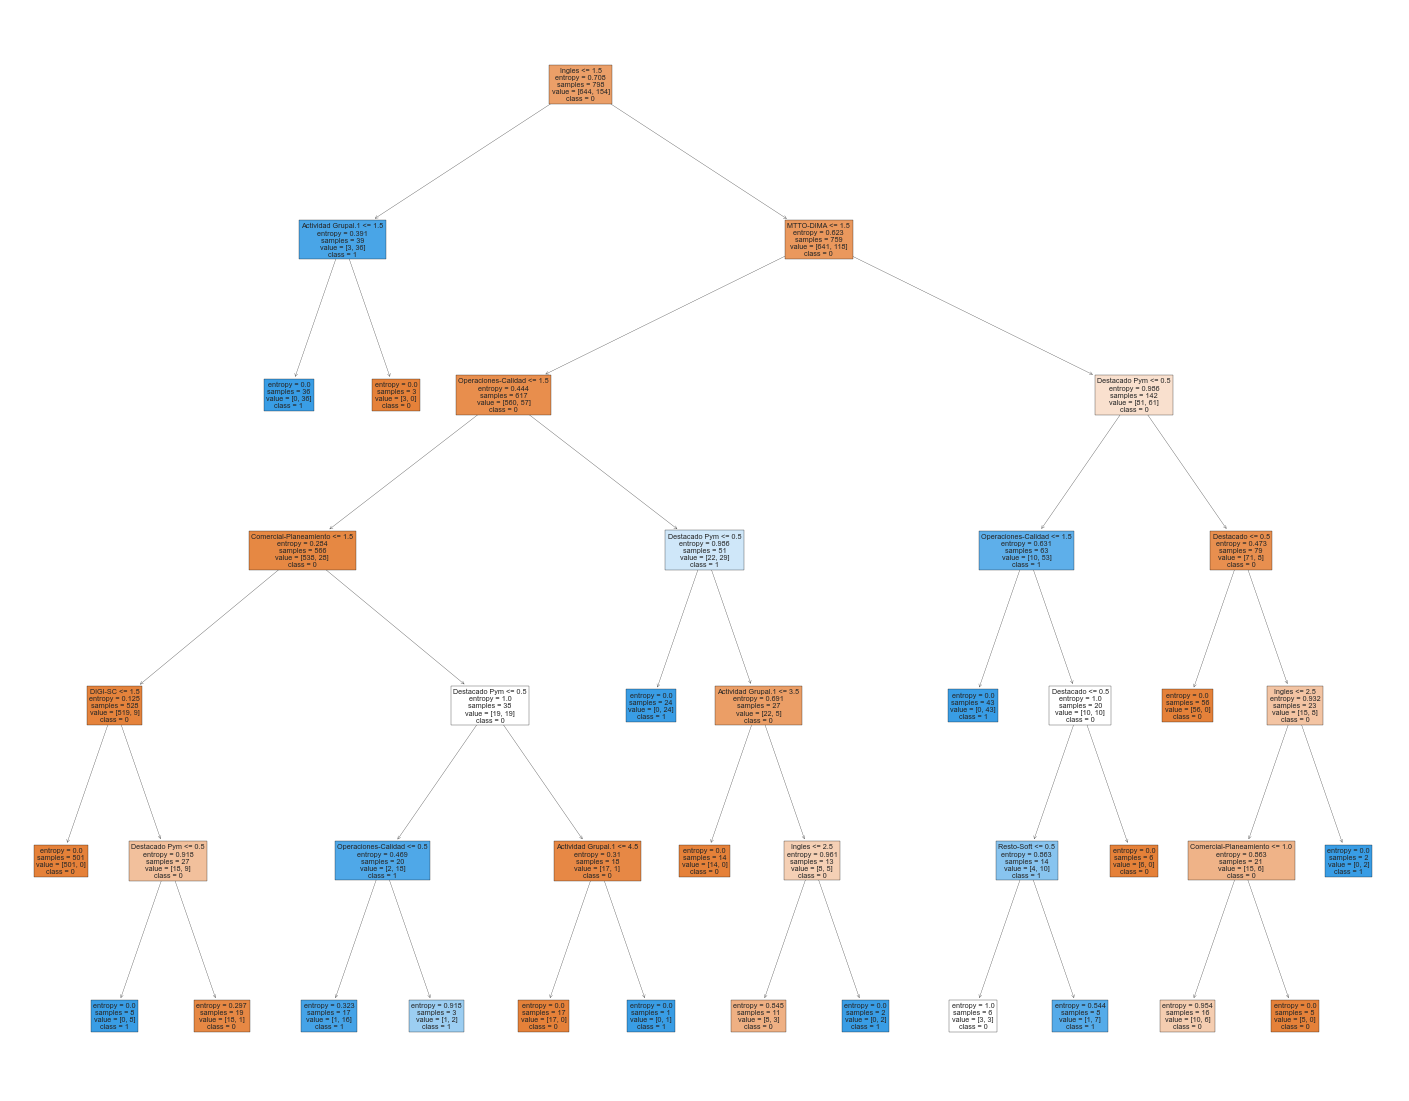

In [386]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_ent, 
                   feature_names=df_mod[feature_names].columns,  
                   class_names=str("01"),
                   filled=True)


In [387]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[308   1]
 [ 12  73]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       309
           1       0.99      0.86      0.92        85

    accuracy                           0.97       394
   macro avg       0.97      0.93      0.95       394
weighted avg       0.97      0.97      0.97       394
 



Score Métrica - Área bajo la curva (AUC): 0.9966114601180278


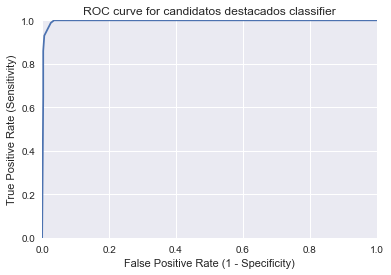

In [388]:
y_prob = dt_ent.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Utilizando el criterio de entropía, el score del modelo es prácticamente el mismo, sólo que para obtenerlo se seleccionaron en esta ocasión 3 ramas. Aunado a esto, de la gráfica ROC y el score del AUC se puede decir que el modelo puede distinguir y clasificar casi en un 100% las clases positivas de las negativas.

### SVM - lineal

In [389]:
X.columns

Index(['Actividad Grupal.1', 'Apto/No Apto', 'Operaciones-Calidad', 'DIGI-SC',
       'MTTO-DIMA', 'Comercial-Planeamiento', 'Resto-Soft', 'Destacado Pym',
       'Ingles', 'Destacado'],
      dtype='object')

In [390]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [391]:
# Creación del modelo SVM lineal
svm = SVC(C = 100, kernel = 'linear', random_state=123)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

C:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [392]:
# Accuracy de test del modelo 
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = True
           )
print("")
print(f"Accuracy: {100*accuracy}%")


Accuracy: 92.05020920502092%


In [393]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[184   8]
 [ 11  36]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       192
           1       0.82      0.77      0.79        47

    accuracy                           0.92       239
   macro avg       0.88      0.86      0.87       239
weighted avg       0.92      0.92      0.92       239
 



Score Métrica - Área bajo la curva (AUC): 0.9987810283687943


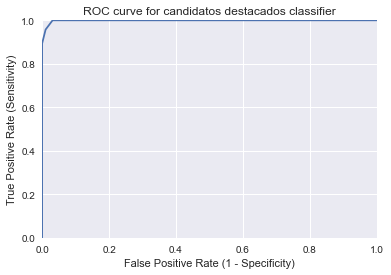

In [394]:
y_prob = dt_ent.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### SVM - radial

Se repite el ajuste del modelo, esta vez empleando un kernel radial y utilizando `validación cruzada` para identificar el valor óptimo de penalización` C.`

In [395]:
from sklearn.model_selection import GridSearchCV

# Grid de hiperparámetros
# ==============================================================================
# param_grid = {'C': np.logspace(-5, 7, 20)}
param_grid = {'C': np.logspace(-5, 7, 20), "kernel":["rbf"], "gamma":["scale"]}  

# Búsqueda por validación cruzada
# El cross validation asegura que NO HALLA SOBREAJUSTE
# ==============================================================================
#------- Evalúa todo de un jalón para hallar el parámetro óptimo (FUERZA BRUTA)
#------- La desventaja es que utiliza muchos recursos y podría tardarse demasiado tiempo en evaluar cada subjconjuntos 
#------- Para evitar utilizar demasiado tiempo en esto, se puede utilizar el RANDOMIZER SEARCH,
#------- RANDOMIZER SEARCH: NO nos dará el parámetro óptimo, pero con este método se pueden hacer pruebas más grandes y ahorrar tiempo

grid = GridSearchCV( #Evalúa todas las combinaciones posibles para encontrar los mejores
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, #Segmentación en subconjuntos
        verbose    = 0,
        return_train_score = True
      )


In [396]:
# Grid de hiperparámetros
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

C:\Users\javih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
9,4.83293,0.970623,0.008240,0.985835,0.002221
10,20.691381,0.966421,0.009021,0.991605,0.000745
11,88.586679,0.961170,0.005390,0.992654,0.000747
18,2335721.46909,0.961170,0.005390,0.992654,0.000747
17,545559.478117,0.961170,0.005390,0.992654,0.000747


In [397]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

svm_rad = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 4.832930238571752} : 0.9706234417263523 accuracy


In [398]:
# Predicciones test
y_pred = svm_rad.predict(X_test)

In [399]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[188   4]
 [  3  44]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       192
           1       0.92      0.94      0.93        47

    accuracy                           0.97       239
   macro avg       0.95      0.96      0.95       239
weighted avg       0.97      0.97      0.97       239
 



Score Métrica - Área bajo la curva (AUC): 0.9987810283687943


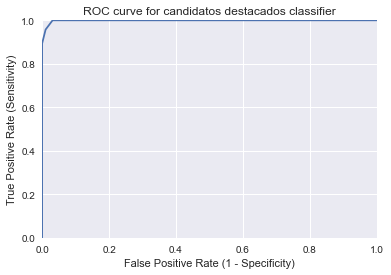

In [400]:
y_prob = dt_ent.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### Resultados



Ya sea con svm lineal o radial se obtuvieron resultados muy similares, aún cuando se implementó el cross validation test para el kernel radial. Ambos resultados en general muy buenos 

### GNB

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=4)

In [460]:
gnb = GaussianNB()
#Entreno el modelo
gnb.fit(X_train, y_train)
#Realizo una predicción
y_pred = gnb.predict(X_test)

In [403]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[188   3]
 [  2  46]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.94      0.96      0.95        48

    accuracy                           0.98       239
   macro avg       0.96      0.97      0.97       239
weighted avg       0.98      0.98      0.98       239
 



Score Métrica - Área bajo la curva (AUC): 0.99967277486911


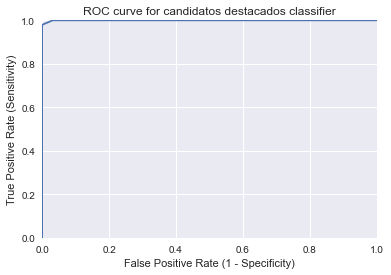

In [404]:
y_prob = dt_ent.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Random Forest

In [405]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy')
#Entreno el modelo
rf.fit(X_train, y_train)
#Realizo una predicción
y_pred = rf.predict(X_test)

In [406]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred), '\n')

[[188   3]
 [  2  46]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.94      0.96      0.95        48

    accuracy                           0.98       239
   macro avg       0.96      0.97      0.97       239
weighted avg       0.98      0.98      0.98       239
 



Score Métrica - Área bajo la curva (AUC): 0.99967277486911


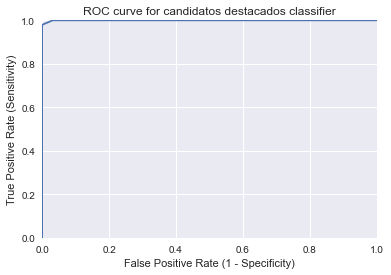

In [407]:
y_prob = dt_ent.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('Score Métrica - Área bajo la curva (AUC):', roc_auc_score(y_test, y_prob))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for candidatos destacados classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Selección del modelo - SVM lineal

### Evaluación del modelo

In [410]:
X.head()

,Actividad Grupal.1,Apto/No Apto,Operaciones-Calidad,DIGI-SC,MTTO-DIMA,Comercial-Planeamiento,Resto-Soft,Destacado Pym,Ingles,Destacado
0,5.0,1.0,2.0,0.0,1.0,2.0,0.0,1,2.0,1
1,5.0,1.0,2.0,0.0,0.0,0.0,0.0,1,2.0,1
2,5.0,1.0,2.0,1.0,2.0,0.0,2.0,1,2.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0


In [411]:
df_mod.Especialidad.value_counts()

0    730
9    170
4     98
2     71
7     66
8     36
3     16
1      3
5      1
6      1
Name: Especialidad, dtype: int64

In [412]:
for col in X:
    print(X[col].unique())

[5. 0. 4. 2. 3. 1.]
[1. 0.]
[2. 0. 1.]
[0. 1. 2.]
[1. 0. 2.]
[2. 0. 1.]
[0. 2. 1.]
[1 0]
[2. 1. 3. 0.]
[1 0]


In [413]:
classes = {0: 'No es altamente recomendado', 1: 'Altamente Recomendado'}

In [538]:
x_unseen = [[5,1,2,2,2,2,1,1,3,1],
            [0,0,0,0,0,0,0,0,3,0],
            [3,1,1,1,1,1,1,1,2,1],
            [4,1,1,1,1,1,1,1,2,1],
            [5,1,1,2,2,1,2,1,3,1],
            [3,0,1,2,1,1,2,1,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [3,1,2,2,2,2,2,1,1,1],
            [3,1,2,2,2,1,1,1,3,1]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=4)

# X_train, X_test, y_train, y_test = train_test_split(
#                                         X,
#                                         y.values.reshape(-1,1),
#                                         train_size   = 0.8,
#                                         random_state = 1234,
#                                         shuffle      = True
#                                     )

In [539]:
y_predict = svm.predict(x_unseen)

In [540]:
predicciones = []

for i in range (len(x_unseen)):
    predicciones.append(y_predict[i])
    print (classes[y_predict[i]])

Altamente Recomendado
No es altamente recomendado
No es altamente recomendado
No es altamente recomendado
Altamente Recomendado
No es altamente recomendado
No es altamente recomendado
Altamente Recomendado
Altamente Recomendado


In [534]:
predicciones

[1, 0, 0, 0, 1, 0, 0, 1, 1]

In [473]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.941423
1  SVC  0.995816
2   LR  0.899582
3   DT  0.979079
4  GNB  0.246862
5   RF  0.979079
6   GB  0.983264
